<a href="https://colab.research.google.com/github/nerdyvyoma136/Analysis-of-Cooking-Recipe/blob/main/Stats_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Epicurious Cooking Dataset**

**Project Members:**<br>
Vyoma Patel AU2044005<br>
Vaishnavi Sanjana Karri AU20110006

In [ ]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt,log
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import math
from scipy import stats

In [ ]:
from google.colab import files
files.upload()

Saving epi_r.csv to epi_r.csv


In [ ]:
#Loading Dataset
df = pd.read_csv('epi_r.csv')
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,...,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Data Preprocessing**

In [ ]:
df.info() #checking datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [ ]:
#checking null values for each column
df.isnull().sum() 

title            0
rating           0
calories      4117
protein       4162
fat           4183
              ... 
cookbooks        0
leftovers        0
snack            0
snack week       0
turkey           0
Length: 680, dtype: int64

In [ ]:
#Dropping rows if any of the values in particular row is NaN or missing
df = df.dropna(axis = 0, how ='any') 

In [ ]:
df

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,...,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cr

In [ ]:
#Dropping rows having calorie value above than 10000
df = df[df['calories'] < 10000].dropna()
df

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,...,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cr

In [ ]:
#Again dropping rows and checking if any duplicates found to be removed
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.shape 

(14429, 680)

In [ ]:
#Basic Statistics summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,14429.0,3.763298,1.273820,0.0,3.75,4.375,4.375,5.0
calories,14429.0,503.181579,615.368360,0.0,206.00,346.000,599.000,9831.0
protein,14429.0,22.072839,43.227534,0.0,3.00,9.000,28.000,1625.0
fat,14429.0,28.617853,43.390332,0.0,8.00,18.000,34.000,923.0
sodium,14429.0,723.126066,3084.860929,0.0,89.00,305.000,732.000,132220.0
...,...,...,...,...,...,...,...,...
cookbooks,14429.0,0.000139,0.011773,0.0,0.00,0.000,0.000,1.0
leftovers,14429.0,0.000347,0.018613,0.0,0.00,0.000,0.000,1.0
snack,14429.0,0.001386,0.037206,0.0,0.00,0.000,0.000,1.0
snack week,14429.0,0.000832,0.028827,0.0,0.00,0.000,0.000,1.0


# Exploratory Data Analysis for whole dataframe

Text(0.5, 1.0, 'Composistion of Veg and Non-Veg Recipes')

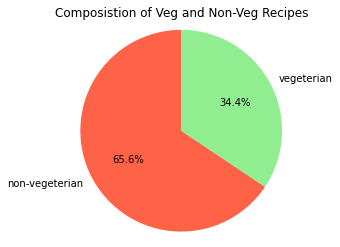

In [ ]:
veg_nv = df.groupby(["vegetarian"])["title"].count()
plt.figure(figsize=(4,4))
plt.pie(veg_nv,labels=["non-vegeterian","vegeterian"],autopct='%1.1f%%', startangle=90, colors=["tomato","lightgreen"])
plt.axis("equal")
plt.title("Composistion of Veg and Non-Veg Recipes")

The pie chart above showcases that out of about 14000 recipes, **34.4% are vegetarian** and **rest are non-vegetarian recipes**.

Text(0.5, 1.0, 'Relationship between rating and calories')

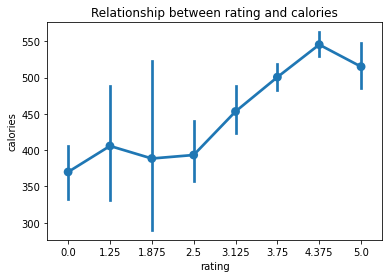

In [ ]:
ax=sns.pointplot(x="rating",y="calories", data=df)
ax.set(ylabel='calories')
plt.title("Relationship between rating and calories")

The pointplot above shows that the recipe which are having **4.375 rating has calorie value near to 550.** And simultaneously for other ratings the respective calorie count range is shown.

Text(0.5, 1.0, 'Correlation between rating & nutrition features of recipes')

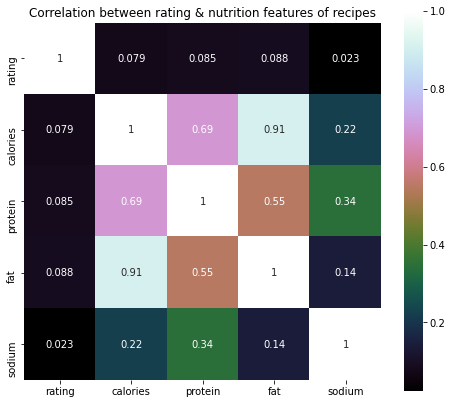

In [ ]:
correlation = df.iloc[:,1:6].corr()
plt.figure(figsize=(8,7))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between rating & nutrition features of recipes')

The **correlation matrix** above shows the **nutritional parameters of recipe  like fat, sodium, protein, calories with ratings.** From this we can conclude that **calorie value do have strong relation with protein, sodium and fat values.**

# **Regression Analysis**

In [ ]:
sns.set_theme(color_codes=True)

In [ ]:
y = df['calories']
X = df[['fat', 'sodium', 'protein']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [455.01639731  13.85036928 179.06362286]


In [ ]:
from sklearn import metrics

In [ ]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

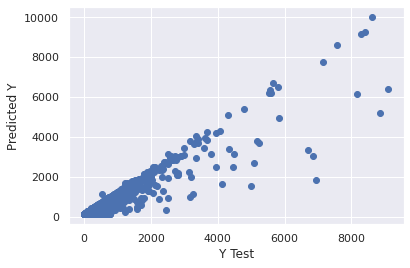

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
#Linear Regression
pred_train_lm= lm.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lm)))
print(r2_score(y_train, pred_train_lm))

pred_test_lm= lm.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lm))) 
print(r2_score(y_test, pred_test_lm))

208.69684083933754
0.8833178367025409
220.7945604119183
0.8748554269844601


In [ ]:
#Ridge Regression
rr = Ridge(alpha=0.1)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

208.6968408940187
0.8833178366413965
220.79459826624324
0.8748553840734052


In [ ]:
#Lasso Regression
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

208.69684110025065
0.8833178364107884
220.7940102681758
0.8748560506177403


From the above **three models of regression** we can see almost the **training and testing accuracy of all 3 remained the same** and indicates that we can **predict** the calorie value with the three nutrition parameter which are **fat, sodium and protein.**<br>
The **R2 score** is also **near 0.9** which shows **model is better.**

# **Chi Square Analysis**

**H0:** The relationship of dish type(veg/non-veg) has a relation with that of high fiber.</br>
**H1:** Type of dish(veg/non-veg) is independent with that of high fiber value.

In [ ]:
ct1 = pd.crosstab(df['vegetarian'], df['high fiber'], margins=True)
ct1

high fiber,0.0,1.0,All
vegetarian,,,
0.0,9200,267,9467
1.0,4657,305,4962
All,13857,572,14429


In [ ]:
obs = np.append(ct1.iloc[0][0:2].values, ct1.iloc[1][0:2].values)
obs

array([9200,  267, 4657,  305])

In [ ]:
row_sum = ct1.iloc[0:2,2].values
exp = []
for j in range(2):
    for val in ct1.iloc[2,0:2].values:
        exp.append(val * row_sum[j] / ct1.loc['All', 'All'])
exp

[9091.70552359831, 375.29447640169104, 4765.294476401691, 196.70552359830896]

In [ ]:
chi_sq_stats = ((obs - exp)**2/exp).sum()
chi_sq_stats

94.62086830647927

In [ ]:
dof = (len(row_sum)-1)*(len(ct1.iloc[2,0:2].values)-1)
dof

1

In [ ]:
1 - stats.chi2.cdf(chi_sq_stats, dof)

0.0

In [ ]:
obs = np.array([ct1.iloc[0][0:2].values,
                  ct1.iloc[1][0:2].values])
stats.chi2_contingency(obs)[0:3]

(93.74914855450835, 3.5815615190897404e-22, 1)

From the above **chi square result**, it **chisquare value as 93.74914855450835** and **p- value as 3.5815615190897404e-22**. So the **null hypothesis here gets rejected**. <br>
And it proves that **high fiber value** has nothing to do whether it is **vegetarian/non-vegetarian.**

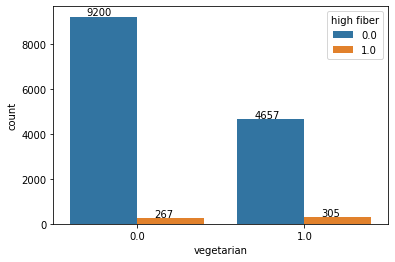

In [ ]:
ax = sns.countplot(x='vegetarian',hue='high fiber',data=df)
for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

**H0:** The dependence of recipe type(veg/non-veg) with low calorie value.<br>
**H2:** The independence of recipe type(veg/non-veg) with low calorie value.

In [ ]:
ct2 = pd.crosstab(df['vegetarian'], df['low cal'], margins=True)
ct2

low cal,0.0,1.0,All
vegetarian,,,
0.0,9178,289,9467
1.0,4732,230,4962
All,13910,519,14429


In [ ]:
obs = np.append(ct2.iloc[0][0:2].values, ct2.iloc[1][0:2].values)
obs

array([9178,  289, 4732,  230])

In [ ]:
row_sum = ct2.iloc[0:2,2].values
exp = []
for j in range(2):
    for val in ct2.iloc[2,0:2].values:
        exp.append(val * row_sum[j] / ct2.loc['All', 'All'])
exp

[9126.479312495669, 340.52068750433153, 4783.520687504331, 178.47931249566844]

In [ ]:
obs = np.array([ct2.iloc[0][0:2].values,
                  ct2.iloc[1][0:2].values])
stats.chi2_contingency(obs)[0:3]

(23.05885233738656, 1.5711742823626461e-06, 1)

Based on the above test, it shows **chi square result value as 23.05885233738656** and **p-value as 1.5711742823626461e-06.**<br>
Hence we **reject the null hypothesis**<br>
It is clear that the myth about that **non-vegetarian recipe has slight higher calories than vegetarian recipe** is proved **wrong.** 

**H0:** There is a dependence of low carb value with recipe type(veg/non-veg) of recipes.<br>
**H3:** There is no dependence between low carb value of recipe with recipe type(veg/non-veg).

In [ ]:
ct3 = pd.crosstab(df['vegetarian'], df['low carb'], margins=True)
ct3

low carb,0.0,1.0,All
vegetarian,,,
0.0,9248,219,9467
1.0,4929,33,4962
All,14177,252,14429


In [ ]:
obs = np.append(ct3.iloc[0][0:2].values, ct3.iloc[1][0:2].values)
obs

array([9248,  219, 4929,   33])

In [ ]:
row_sum = ct3.iloc[0:2,2].values
exp = []
for j in range(2):
    for val in ct3.iloc[2,0:2].values:
        exp.append(val * row_sum[j] / ct3.loc['All', 'All'])
exp

[9301.660475431423, 165.33952456857716, 4875.339524568577, 86.66047543142282]

In [ ]:
obs = np.array([ct3.iloc[0][0:2].values,
                  ct3.iloc[1][0:2].values])
stats.chi2_contingency(obs)[0:3]

(50.58623948147327, 1.140418312235063e-12, 1)

The above results show the **chi-square value** as **50.58623948147327** and **p-value** as **1.140418312235063e-12**.<br>
Hence we reject null hypothesis.
It again states that **low carb value is independent of recipe type**.

**H0:** There is a dependence of cholesterol with that of recipe type.<br>
**H4:** There is an independence of cholesterol value with that of recipe type.

In [ ]:
ct4 = pd.crosstab(df['vegetarian'], df['low cholesterol'], margins=True)
ct4

low cholesterol,0.0,1.0,All
vegetarian,,,
0.0,9392,75,9467
1.0,4810,152,4962
All,14202,227,14429


In [ ]:
obs = np.append(ct4.iloc[0][0:2].values, ct4.iloc[1][0:2].values)
obs

array([9392,   75, 4810,  152])

In [ ]:
row_sum = ct4.iloc[0:2,2].values
exp = []
for j in range(2):
    for val in ct4.iloc[2,0:2].values:
        exp.append(val * row_sum[j] / ct4.loc['All', 'All'])
exp

[9318.063206043385, 148.93679395661516, 4883.9367939566155, 78.06320604338485]

In [ ]:
obs = np.array([ct4.iloc[0][0:2].values,
                  ct4.iloc[1][0:2].values])
stats.chi2_contingency(obs)[0:3]

(106.97729561760255, 4.502987539277487e-25, 1)

The above results show the **chi-square value** as **106.97729561760255** and **p-value** as **4.502987539277487e-25**<br>
Hence we reject null hypothesis.
It is clear both the vegetarian and non-vegetarian recipes can contribute to have cholesterol values irrespective on their types.

# Data Processing for Healthy food Classification

In [ ]:
#Dropping unnecessary columns and keeping all ingredients columns
df_new = df.drop(['#cakeweek','#wasteless', '22-minute meals', '3-ingredient recipes',
                  '30 days of groceries', 'advance prep required', 'alabama', 'alaska',
                  'anniversary', 'anthony bourdain', 'appetizer', 'arizona', 'atlanta',
                  'australia', 'back to school', 'backyard bbq', 'bake', 'bastille day', 'beverly hills',
                  'birthday', 'blender', 'bon appétit', 'bon app��tit', 'boston', 'braise', 'breakfast', 'brine',
                  'broil','brooklyn', 'brunch', 'buffalo', 'buffet', 'bulgaria', 'burrito',
                  'cake', 'california', 'cambridge', 'camping', 'canada', 'candy thermometer',
                  'casserole/gratin', 'chicago', 'chile', 'chill', 'christmas', 'christmas eve',
                  'cinco de mayo', 'cobbler/crumble', 'cocktail party', 'coffee grinder',
                  'colorado', 'columbus', 'connecticut', 'cook like a diner', 'cookbook critic',
                  'cookie', 'cookies', 'costa mesa', 'couscous', 'créme de cacao',
                  'crêpe', 'cr��me de cacao', 'cuba', 'cupcake', 'dairy', 'dairy free',
                  'dallas', 'date', 'deep-fry', 'denver', 'dinner', 'dip', 'diwali',
                  'dominican republic', 'dorie greenspan', 'double boiler', 'drink', 'drinks',
                  'easter', 'eau de vie', 'edible gift', 'egypt', 'emeril lagasse', 'engagement party',
                  'england', 'entertaining', 'epi + ushg', 'epi loves the microwave',
                  'fall', 'family reunion', "father's day", 'flaming hot summer', 'florida',
                  'food processor', 'fourth of july', 'france', 'frangelico', 'frankenrecipe',
                  'freeze/chill', 'freezer food', 'friendsgiving', 'frittata', 'fritter',
                  'fry', 'game', 'georgia', 'germany', 'gourmet', 'graduation', 'granola',
                  'grill', 'grill/barbecue', 'guam', 'haiti', 'halloween', 'hamburger', 
                  'hanukkah', 'harpercollins', 'hawaii', 'healdsburg', 'hollywood', 'high fiber', 
                  "hors d'oeuvre", "hominy/cornmeal/masa", 'hot drink', 'house & garden',
                  'house cocktail', 'houston', 'ice cream', 'ice cream machine', 'iced coffee',
                  'iced tea', 'idaho', 'illinois', 'indiana', 'iowa', 'ireland', 'israel',
                  'italy', 'jamaica', 'japan', 'juicer', 'kansas', 'kansas city', 'kentucky',
                  'kentucky derby', 'kid-friendly', 'kidney friendly', 'kitchen olympics', 'kosher',
                  'kosher for passover', 'kwanzaa', 'labor day', 'lancaster', 'las vegas',
                  'london', 'long beach', 'los angeles', 'louisiana', 'louisville', 'low cal',
                  'low carb', 'low cholesterol', 'low fat', 'low sodium', 'low sugar', 'low/no sugar',
                  'lunar new year', 'lunch', 'maine', 'mandoline', 'mardi gras', 'marinade',
                  'marinate', 'marsala', 'marscarpone', 'martini', 'maryland', 'massachusetts', 'mexico',
                  'miami', 'michigan', 'microwave', 'minneapolis', 'minnesota', 'mississippi',
                  'missouri', 'mixer', 'mortar and pestle', "mother's day", 'muffin', 'nancy silverton',
                  'nebraska', 'new jersey', 'new mexico', 'new orleans', "new year's day",
                  "new year's eve", 'new york', 'no meat, no problem', 'no sugar added', 'no-cook',
                  'non-alcoholic', 'noodle', 'north carolina', 'ohio', 'oklahoma', 'oktoberfest',
                  'omelet', 'one-pot meal', 'oregon', 'organic', 'pacific palisades', 'paleo',
                  'pan-fry', 'pancake', 'parade', 'paris', 'party', 'pasadena', 'passover', 'pasta maker',
                  'pastry', 'peanut free', 'pennsylvania', 'persian new year', 'peru', 'pescatarian',
                  'philippines', 'phyllo/puff pastry dough', 'pickles', 'picnic', 'pie', 'pittsburgh',
                  'pizza', 'poach', 'poker/game night', 'port', 'portland', 'pot pie', 'potluck',
                  'poultry', 'pressure cooker', 'providence', 'punch', 'purim', 'quiche',
                  'quick & easy', 'quick and healthy', 'ramadan', 'ramekin', 'raw', 'rhode island',
                  'roast', 'rosh hashanah/yom kippur', 'rub', 'salad dressing', 'salsa',
                  'san francisco', 'sandwich', 'sandwich theory', 'sangria', 'santa monica',
                  'sauté', 'seattle', 'seed', 'self', 'shavuot', 'shower', 'side',
                  'simmer', 'skewer', 'slow cooker', 'smoker', 'smoothie', 'snapper',
                  'sorbet', 'soufflé/meringue', 'soup/stew', 'south carolina', 'soy free',
                  'spain', 'sparkling wine', 'spring', 'spritzer', 'squash', 'st. louis', "st. patrick's day",
                  'steam', 'stir-fry', 'stuffing/dressing', 'sugar conscious', 'sugar snap pea',
                  'sukkot', 'summer', 'super bowl', 'suzanne goin', 'switzerland', 'taco', 'tailgating',
                  'tart', 'tennessee', 'tested & improved', 'texas', 'thanksgiving', 'tortillas',
                  'tree nut', 'tree nut free', 'triple sec', 'tropical fruit', 'utah',
                  "valentine's day", 'vegan', 'vermont', 'virginia', 'waffle', 'washington', 
                  'washington, d.c.', 'wedding', 'weelicious', 'west virginia', 'westwood', 
                  'wheat/gluten-free', 'windsor', 'winter', 'wisconsin', 'wok', 'yonkers',
                  'yuca', 'cookbooks', 'leftovers', 'snack', 'snack week', 'turkey'], axis = 1)
df_new.head()

,title,rating,calories,protein,fat,sodium,alcoholic,almond,amaretto,anchovy,anise,aperitif,apple,apple juice,apricot,artichoke,arugula,asian pear,asparagus,aspen,avocado,bacon,banana,barley,basil,bass,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,biscuit,bitters,blackberry,blue cheese,blueberry,...,stew,stock,strawberry,sweet potato/yam,swiss cheese,swordfish,tamarind,tangerine,tapioca,tarragon,tea,tequila,thyme,tilapia,tofu,tomatillo,tomato,trout,tuna,turnip,vanilla,veal,vegetable,vegetarian,venison,vermouth,vinegar,vodka,walnut,wasabi,watercress,watermelon,whiskey,white wine,whole wheat,wild rice,wine,yellow squash,yogurt,zucchini
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_new.info(5)

Creating new column called Total_Ingredients_Used for each recipe

In [ ]:
list_of_columns = df_new.columns.to_list()
list_of_columns

In [ ]:
list_remove = ['title', 'rating', 'calories', 'protein', 'fat', 'sodium']
final_list = list(set(list_of_columns) - set(list_remove))
final_list

In [ ]:
len(final_list)

340

In [ ]:
df_new['Total_Ingredients_Used'] = final_list[0:].count(1)
df_new.head()

,title,rating,calories,protein,fat,sodium,alcoholic,almond,amaretto,anchovy,anise,aperitif,apple,apple juice,apricot,artichoke,arugula,asian pear,asparagus,aspen,avocado,bacon,banana,barley,basil,bass,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,biscuit,bitters,blackberry,blue cheese,blueberry,...,stock,strawberry,sweet potato/yam,swiss cheese,swordfish,tamarind,tangerine,tapioca,tarragon,tea,tequila,thyme,tilapia,tofu,tomatillo,tomato,trout,tuna,turnip,vanilla,veal,vegetable,vegetarian,venison,vermouth,vinegar,vodka,walnut,wasabi,watercress,watermelon,whiskey,white wine,whole wheat,wild rice,wine,yellow squash,yogurt,zucchini,Total_Ingredients_Used
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df_new["Total_Ingredients_Used"] = df[final_list].sum(axis=1)
df_new

,title,rating,calories,protein,fat,sodium,alcoholic,almond,amaretto,anchovy,anise,aperitif,apple,apple juice,apricot,artichoke,arugula,asian pear,asparagus,aspen,avocado,bacon,banana,barley,basil,bass,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,biscuit,bitters,blackberry,blue cheese,blueberry,...,stock,strawberry,sweet potato/yam,swiss cheese,swordfish,tamarind,tangerine,tapioca,tarragon,tea,tequila,thyme,tilapia,tofu,tomatillo,tomato,trout,tuna,turnip,vanilla,veal,vegetable,vegetarian,venison,vermouth,vinegar,vodka,walnut,wasabi,watercress,watermelon,whiskey,white wine,whole wheat,wild rice,wine,yellow squash,yogurt,zucchini,Total_Ingredients_Used
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
max(df_new['Total_Ingredients_Used'])

19.0

**Exploratory Analysis for Vegetarian Recipes**

In [ ]:
df_v = df_new[df_new['vegetarian']==1.0]
df_v

,title,rating,calories,protein,fat,sodium,alcoholic,almond,amaretto,anchovy,anise,aperitif,apple,apple juice,apricot,artichoke,arugula,asian pear,asparagus,aspen,avocado,bacon,banana,barley,basil,bass,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,biscuit,bitters,blackberry,blue cheese,blueberry,...,stock,strawberry,sweet potato/yam,swiss cheese,swordfish,tamarind,tangerine,tapioca,tarragon,tea,tequila,thyme,tilapia,tofu,tomatillo,tomato,trout,tuna,turnip,vanilla,veal,vegetable,vegetarian,venison,vermouth,vinegar,vodka,walnut,wasabi,watercress,watermelon,whiskey,white wine,whole wheat,wild rice,wine,yellow squash,yogurt,zucchini,Total_Ingredients_Used
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
12,Banana-Chocolate Chip Cake With Peanut Butter ...,4.375,766.0,12.0,48.0,439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
15,Raw Cream of Spinach Soup,4.375,382.0,5.0,31.0,977.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
16,Sweet Buttermilk Spoon Breads,1.875,146.0,4.0,5.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
20,Asian Pear and Watercress Salad with Sesame Dr...,4.375,345.0,11.0,19.0,423.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20004,Grilled Eggplant and Bell Peppers with Roasted...,3.750,94.0,2.0,5.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
20014,Mixed Green Salad with Roquefort Vinaigrette,4.375,305.0,4.0,29.0,189.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
20020,Wilted Red Cabbage and Bell Pepper Slaw,3.750,193.0,2.0,11.0,461.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
20023,Roasted and Raw 

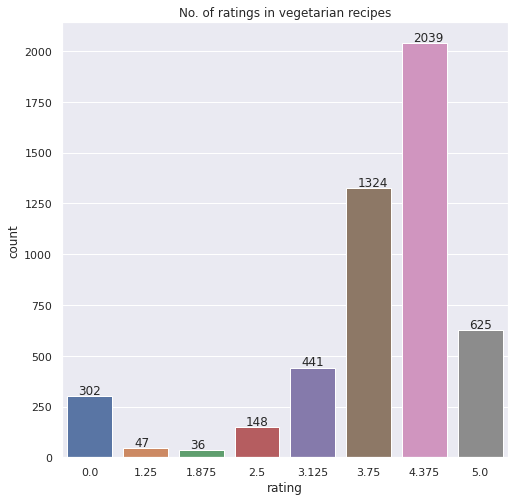

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x=df_v['rating'], data=df_v)
plt.title("No. of ratings in vegetarian recipes")

for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+10))


From the above bar plot we can see that **vegetarian recipe with rating 4.375 are more almost 40%**

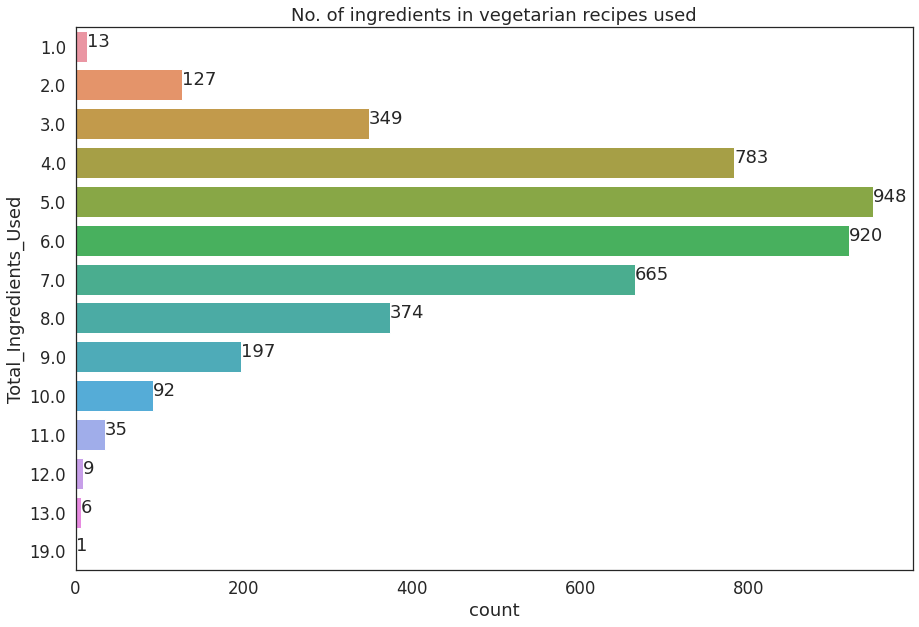

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(y=df_v['Total_Ingredients_Used'], data=df_v)
plt.title("No. of ingredients in vegetarian recipes used")

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
total = len(df_v['Total_Ingredients_Used'])
for p in ax.patches:
        values = '{:.0f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(values, (x, y))

plt.show()

The horizontal bar plot shows that **vegetarian recipe with 4,5 or 6 ingredients are more** than the rest.

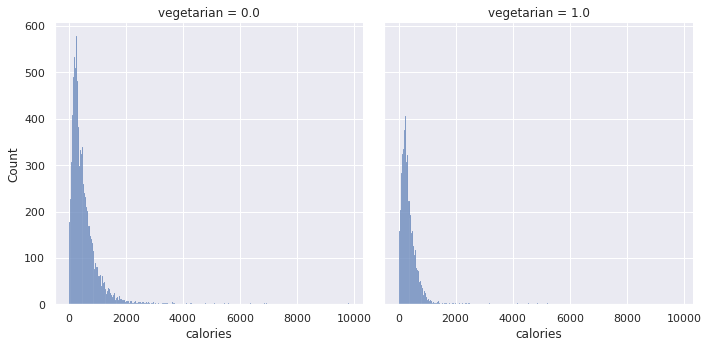

In [ ]:
sns.displot(df_new, x="calories", col="vegetarian", multiple="dodge")

From the above **distribution plot** for **vegetarian and non-vegetarian** recipes in terms  calories, it shows that most of the recipes has **calorie range between 0 to 2000**.

In [ ]:
continuous = ['calories','protein','fat','sodium']
cont_df = df_v[continuous]

cont_df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,4962.0,395.245264,499.829042,2.0,181.00,292.0,474.75,8844.0
protein,4962.0,8.235590,11.378036,0.0,3.00,5.0,10.00,408.0
fat,4962.0,20.967755,31.131503,0.0,7.00,15.0,26.00,535.0
sodium,4962.0,369.124143,900.733130,0.0,55.25,191.0,431.00,45407.0


In [ ]:
#99th quantile values for following columns
cont_df.quantile(q=.99)

calories    2344.36
protein       51.00
fat          120.17
sodium      2779.28
Name: 0.99, dtype: float64

In [ ]:
# Remove recipes with outliers in calories and sodium
idx = df_v.loc[(df_v.calories > 2350.0) | (df_v.sodium > 2780.0)| (df_v.protein > 52)| (df_v.fat > 121)].index
df_v.drop(index=idx, inplace=True)

# Remove recipes with a 0 in any nutrition value
idx0 = df_v.loc[(df_v.calories == 0)|(df_v.sodium == 0) | (df_v.protein == 0) | (df_v.fat == 0)].index
df_v.drop(index=idx0, inplace=True)

df_v.shape

(4519, 347)

**Statistical Analysis for 'Healthy vs Unhealthy' Food in Vegetarian Recipes**

In [ ]:
df_v_stats = df_v[['title','calories','protein','fat','sodium','healthy']]

df_v_stats.shape

(4519, 6)

In [ ]:
df_v_stats.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,4519.0,364.430626,248.928054,13.0,194.0,301.0,480.0,2330.0
protein,4519.0,7.910821,7.159584,1.0,3.0,6.0,10.0,52.0
fat,4519.0,19.559637,16.075930,1.0,9.0,16.0,26.0,117.0
sodium,4519.0,318.808586,368.403587,1.0,67.5,201.0,428.0,2759.0
healthy,4519.0,0.125470,0.331288,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Add a protein/fat column
df_v_stats['prot_fat'] =(df_v_stats.protein/df_v_stats.fat)

# Add a protein/calorie column
df_v_stats['prot_cal'] =(df_v_stats.protein/df_v_stats.calories)

# Add a protein/sodium column
df_v_stats['prot_sod'] =(df_v_stats.protein/df_v_stats.sodium)

#Add a compound column for all the 'bad' nutrition, in log scale 
df_v_stats['compound'] =(df_v_stats.calories*df_v_stats.fat*df_v_stats.sodium)
df_v_stats['compound'] = [math.log10(x) for x in df_v_stats['compound']]

In [ ]:
healthy_v_food = df_v_stats[df_v_stats['healthy']==1]
unhealthy_v_food = df_v_stats[df_v_stats['healthy']==0]

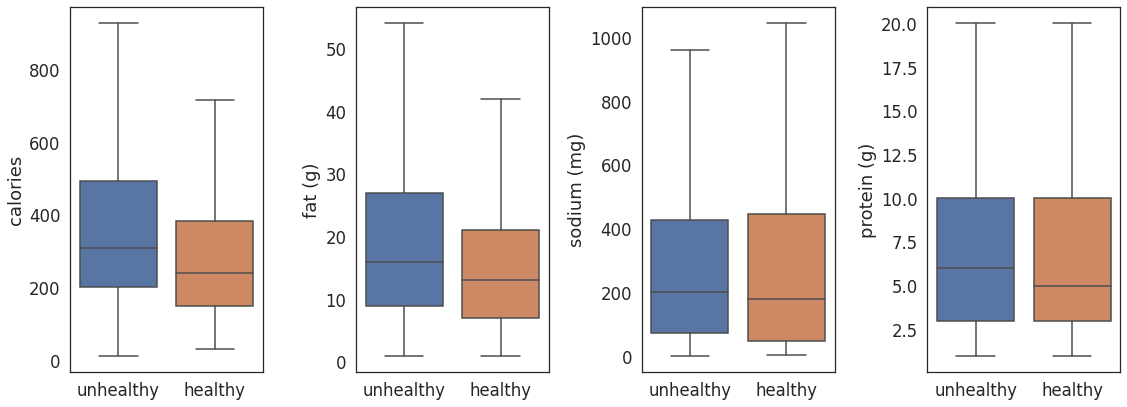

In [ ]:
fig, axs = plt.subplots(ncols=4, figsize=(16,6),sharex=True)

sns.boxplot(y= 'calories', x='healthy', data=df_v_stats, showfliers=False, ax=axs[0])
sns.boxplot(y= 'fat', x='healthy', data=df_v_stats, showfliers=False, ax=axs[1])
sns.boxplot(y= 'sodium', x='healthy', data=df_v_stats, showfliers=False, ax=axs[2])
sns.boxplot(y= 'protein', x='healthy', data=df_v_stats, showfliers=False, ax=axs[3])

axs[0].set_xticklabels(['unhealthy','healthy'])
axs[1].set_xticklabels(['unhealthy','healthy'])
axs[2].set_xticklabels(['unhealthy','healthy'])
axs[3].set_xticklabels(['unhealthy','healthy'])

axs[0].set_xlabel(None)
axs[1].set_xlabel(None)
axs[2].set_xlabel(None)
axs[3].set_xlabel(None)

axs[1].set_ylabel('fat (g)')
axs[2].set_ylabel('sodium (mg)')
axs[3].set_ylabel('protein (g)')

plt.tight_layout()
# plt.legend()


From the box plots it shows that **unhealthy food has higher calories, sodium content, fat and protein values than healthy food** in vegetarian recipes.

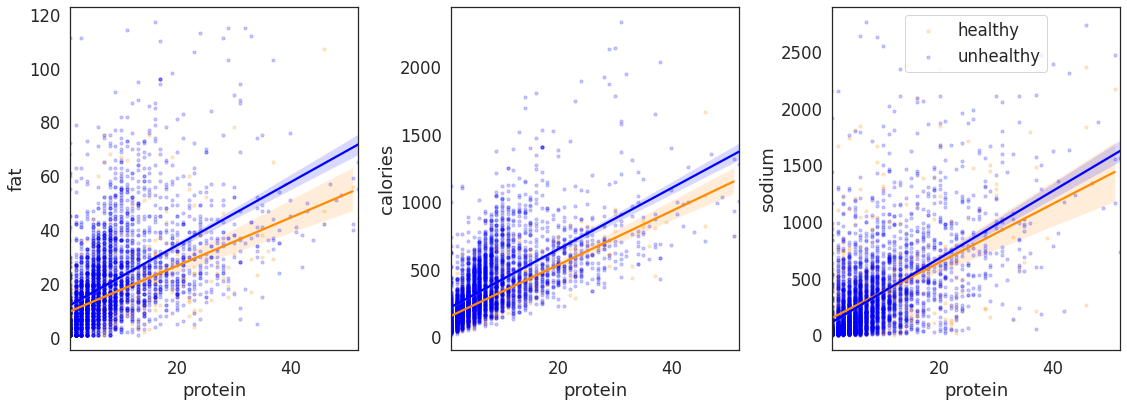

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(16,6))
sns.set(font_scale=1.5)
sns.set_style("white")

s=10

sns.regplot(x='protein',y='fat',data=healthy_v_food, label='healthy',scatter_kws={'alpha':0.2,'s':s},ax=axs[0],color='darkorange')
sns.regplot(x='protein',y='fat',data=unhealthy_v_food, label='unhealthy',scatter_kws={'alpha':0.2,'s':s},ax=axs[0],color='blue')

sns.regplot(x='protein',y='calories',data=healthy_v_food, label='healthy',scatter_kws={'alpha':0.2,'s':s},ax=axs[1],color='darkorange')
sns.regplot(x='protein',y='calories',data=unhealthy_v_food, label='unhealthy',scatter_kws={'alpha':0.2,'s':s},ax=axs[1],color='blue')

sns.regplot(x='protein',y='sodium',data=healthy_v_food, label='healthy',scatter_kws={'alpha':0.2,'s':s},ax=axs[2],color='darkorange')
sns.regplot(x='protein',y='sodium',data=unhealthy_v_food, label='unhealthy',scatter_kws={'alpha':0.2,'s':s},ax=axs[2],color='blue')

plt.tight_layout()
plt.legend()

The **paired regression plots** plotted for protein against other three feature also shows that **unhealthy food has high amount of fat, sodium and calories** than the healthier ones. 

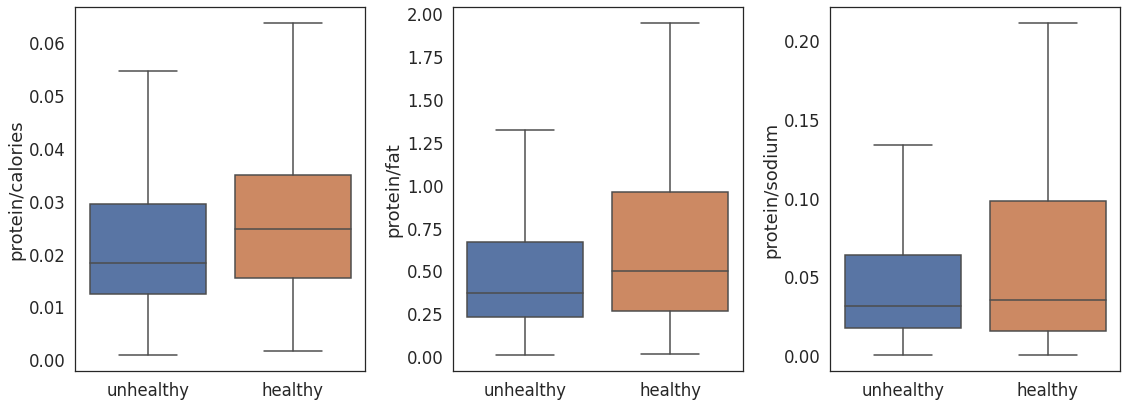

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(16,6))

sns.boxplot(y= 'prot_cal', x='healthy', data=df_v_stats, showfliers=False, ax=axs[0])
sns.boxplot(y= 'prot_fat', x='healthy', data=df_v_stats, showfliers=False, ax=axs[1])
sns.boxplot(y= 'prot_sod', x='healthy', data=df_v_stats, showfliers=False, ax=axs[2])

axs[0].set_xticklabels(['unhealthy','healthy'])
axs[1].set_xticklabels(['unhealthy','healthy'])
axs[2].set_xticklabels(['unhealthy','healthy'])


axs[0].set_xlabel(None)
axs[1].set_xlabel(None)
axs[2].set_xlabel(None)


axs[0].set_ylabel('protein/calories')
axs[1].set_ylabel('protein/fat')
axs[2].set_ylabel('protein/sodium')

plt.tight_layout()

Now these box plots shows that for healthy food in vegetarian recipes **protein per other 3 features are higher than unhealthy**, which signifies that **healthy food has slight high amount of protein** than unhealthier ones.

In [ ]:
#sodium ideal limit of no more than 1,500 mg per day for most adults.
print(healthy_v_food.sodium.mean())
print(unhealthy_v_food.sodium.mean())

333.7813051146384
316.66042510121457


In [ ]:
healthy_v_food.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,567.0,295.192240,201.677961,31.000000,149.000000,239.000000,383.500000,1662.000000
protein,567.0,8.139330,7.953708,1.000000,3.000000,5.000000,10.000000,51.000000
fat,567.0,16.045855,13.950620,1.000000,7.000000,13.000000,21.000000,107.000000
sodium,567.0,333.781305,431.323006,2.000000,45.500000,178.000000,446.000000,2623.000000
healthy,567.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
prot_fat,567.0,0.757062,0.866637,0.014706,0.264232,0.500000,0.958333,7.000000
prot_cal,567.0,0.026878,0.014518,0.001595,0.015424,0.024648,0.034965,0.082774
prot_sod,567.0,0.125288,0.371554,0.000464,0.015742,0.035294,0.097750,6.000000
compound,567.0,5.552720,1.079081,2.089905,4.789403,5.674246,6.284958,8.623479


In [ ]:
unhealthy_v_food.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,3952.0,374.364372,253.464493,13.000000,202.000000,309.000000,492.000000,2330.00000
protein,3952.0,7.878036,7.038801,1.000000,3.000000,6.000000,10.000000,52.00000
fat,3952.0,20.063765,16.297754,1.000000,9.000000,16.000000,27.000000,117.00000
sodium,3952.0,316.660425,358.483500,1.000000,71.000000,202.000000,427.250000,2759.00000
healthy,3952.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
prot_fat,3952.0,0.579652,0.728389,0.009009,0.230769,0.370899,0.666667,13.00000
prot_cal,3952.0,0.022209,0.013702,0.000898,0.012422,0.018203,0.029341,0.10000
prot_sod,3952.0,0.079043,0.217979,0.000523,0.017319,0.031566,0.063830,6.00000
compound,3952.0,5.830541,1.065652,1.954243,5.195382,5.947367,6.574261,8.60852


**Bootstrap healthy and unhealthy foods per nutrition in vegetarian recipes**

In [ ]:
from math import sqrt
from sklearn.utils import resample

In [ ]:
#sodium

x_mean = healthy_v_food.sodium.mean()
y_mean = unhealthy_v_food.sodium.mean()

x_std = healthy_v_food.sodium.std()
y_std = unhealthy_v_food.sodium.std()

t_fat = (x_mean-y_mean)/sqrt((x_std**2/len(healthy_v_food))+(y_std**2/len(unhealthy_v_food)))

z = df_v_stats.sodium.mean()

xx = healthy_v_food.sodium - x_mean + z
yy = unhealthy_v_food.sodium - y_mean + z

t_bs=0
n_sim = 1000
for i in range(n_sim):
    x_bs= resample(xx, replace=True, n_samples=len(xx))
    y_bs= resample(yy, replace=True, n_samples=len(yy))
    ttest = (x_bs.mean()-y_bs.mean())/sqrt((x_bs.std()**2/len(x_bs))+(y_bs.std()**2/len(y_bs)))
    if ttest>=t_fat:
        t_bs+=1

t_bs/n_sim

0.176

In [ ]:
#fat

x_mean = healthy_food.fat.mean()
y_mean = unhealthy_food.fat.mean()

x_std = healthy_food.fat.std()
y_std = unhealthy_food.fat.std()

t_fat = (x_mean-y_mean)/sqrt((x_std**2/len(healthy_food))+(y_std**2/len(unhealthy_food)))

z = df_v_stats.fat.mean()

xx = healthy_food.fat - x_mean + z
yy = unhealthy_food.fat - y_mean + z

t_bs=0
n_sim = 1000
for i in range(n_sim):
    x_bs= resample(xx, replace=True, n_samples=len(xx))
    y_bs= resample(yy, replace=True, n_samples=len(yy))
    ttest = (x_bs.mean()-y_bs.mean())/sqrt((x_bs.std()**2/len(x_bs))+(y_bs.std()**2/len(y_bs)))
    if ttest>=t_fat:
        t_bs+=1

t_bs/n_sim

1.0

In [ ]:
#protein
x_mean = healthy_food.protein.mean()
y_mean = unhealthy_food.protein.mean()

x_std = healthy_food.protein.std()
y_std = unhealthy_food.protein.std()

t_protein = (x_mean-y_mean)/sqrt((x_std**2/len(healthy_food))+(y_std**2/len(unhealthy_food)))

z = df_v_stats.protein.mean()

xx = healthy_food.protein - x_mean + z
yy = unhealthy_food.protein - y_mean + z

t_bs=0
n_sim = 1000
for i in range(n_sim):
    x_bs= resample(xx, replace=True, n_samples=len(xx))
    y_bs= resample(yy, replace=True, n_samples=len(yy))
    ttest = (x_bs.mean()-y_bs.mean())/sqrt((x_bs.std()**2/len(x_bs))+(y_bs.std()**2/len(y_bs)))
    if ttest>=t_protein:
        t_bs+=1

t_bs/n_sim

0.219

In [ ]:
#calories
x_mean = healthy_food.calories.mean()
y_mean = unhealthy_food.calories.mean()

x_std = healthy_food.calories.std()
y_std = unhealthy_food.calories.std()

t_calories = (x_mean-y_mean)/sqrt((x_std**2/len(healthy_food))+(y_std**2/len(unhealthy_food)))

z = df_v_stats.calories.mean()

xx = healthy_food.calories - x_mean + z
yy = unhealthy_food.calories - y_mean + z

t_bs=0
n_sim = 1000
for i in range(n_sim):
    x_bs= resample(xx, replace=True, n_samples=len(xx))
    y_bs= resample(yy, replace=True, n_samples=len(yy))
    ttest = (x_bs.mean()-y_bs.mean())/sqrt((x_bs.std()**2/len(x_bs))+(y_bs.std()**2/len(y_bs)))
    if ttest>=t_calories:
        t_bs+=1

t_bs/n_sim

1.0

**Healthy Recipe Classification in Vegetarian Recipes**

In [ ]:
X = df_v.drop(['title','healthy', 'rating', 'protein', 'sodium', 'fat', 'calories', 'dessert', 'Total_Ingredients_Used'],axis=1)
y = df_v['healthy']

from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1902, stratify = y, test_size = .1)

**Resampling the whole dataset**

In [ ]:
from sklearn.utils import resample
# concatenate our training data back together
X_resample = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
healthy = X_resample[X_resample.healthy==1]
unhealthy = X_resample[X_resample.healthy==0]
print(f"healthy original count: {len(healthy)}")
print(f"unhealthy original count: {len(unhealthy)}")

# downsample majority
unhealthy_downsampled = resample(unhealthy,
                               replace = False, # sample without replacement
                               n_samples = len(healthy), # match minority n
                               random_state = 0) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([unhealthy_downsampled, healthy])

# checking counts
downsampled.healthy.value_counts()

healthy original count: 510
unhealthy original count: 3557


1.0    510
0.0    510
Name: healthy, dtype: int64

In [ ]:
X_rs_train = downsampled.drop('healthy', axis=1)
y_rs_train = downsampled['healthy']

In [ ]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
# Running a standard random forest 
forest = RandomForestClassifier(n_jobs=-1,
                                random_state=50, n_estimators=200, max_depth=7, max_features='sqrt')

forest.fit(X_rs_train, y_rs_train)

pred_forest = forest.predict(X_rs_train)
pred_forest_test = forest.predict(X_test)

train_m = classification_report(y_rs_train, pred_forest)
test_m = classification_report(y_test, pred_forest_test)
print(train_m)
print(test_m)

              precision    recall  f1-score   support

         0.0       0.88      0.65      0.75       510
         1.0       0.72      0.91      0.81       510

    accuracy                           0.78      1020
   macro avg       0.80      0.78      0.78      1020
weighted avg       0.80      0.78      0.78      1020

              precision    recall  f1-score   support

         0.0       0.98      0.57      0.72       395
         1.0       0.24      0.93      0.38        57

    accuracy                           0.62       452
   macro avg       0.61      0.75      0.55       452
weighted avg       0.89      0.62      0.68       452



In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
classes=['unhealthy','healthy']
cnf_matrix = confusion_matrix(y_test, pred_forest_test)
print(cnf_matrix)

[[236 159]
 [  4  53]]


In [ ]:
# Using Grid Search and Cross Validation

# Set grid search params
param_grid_forest = [ 
  {'n_estimators': [200, 250, 275],
   'criterion': ['gini','entropy'], 
   'max_depth': [5,8,9] 
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=forest,
            param_grid=param_grid_forest,
            scoring='precision',
            refit='precision',
            cv=5, verbose=2, return_train_score = True,
            n_jobs=-1)

# Fit using grid search
gs_rf.fit(X_rs_train, y_rs_train)

best_parameters = gs_rf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

# Best accuracy
print('Best precision: %.3f' % gs_rf.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   38.5s finished


Grid Search found the following optimal parameters: 
criterion: 'gini'
max_depth: 8
n_estimators: 200
Best precision: 0.684


In [ ]:
# Fit using grid search

best_forest = gs_rf.best_estimator_
best_forest.fit(X_rs_train, y_rs_train)

pred_gs_rf_train = best_forest.predict(X_rs_train)
pred_gs_rf_test = best_forest.predict(X_test)

print(classification_report(y_rs_train, pred_gs_rf_train))
print(classification_report(y_test, pred_gs_rf_test))

              precision    recall  f1-score   support

         0.0       0.88      0.67      0.76       510
         1.0       0.73      0.91      0.81       510

    accuracy                           0.79      1020
   macro avg       0.81      0.79      0.79      1020
weighted avg       0.81      0.79      0.79      1020

              precision    recall  f1-score   support

         0.0       0.98      0.60      0.75       395
         1.0       0.25      0.93      0.40        57

    accuracy                           0.64       452
   macro avg       0.62      0.76      0.57       452
weighted avg       0.89      0.64      0.70       452



In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
classes=['unhealthy','healthy']
cnf_matrix = confusion_matrix(y_test, pred_gs_rf_test)
print(cnf_matrix)

[[237 158]
 [  4  53]]


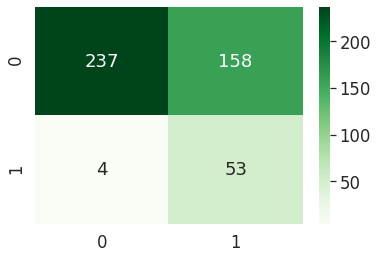

In [ ]:
#Confusion Matrix
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True, fmt='g', cmap='Greens')

0 - Unhealthy
1 - Healthy

salad           0.084955
milk/cream      0.049511
quinoa          0.040385
beet            0.038238
egg             0.037331
fennel          0.035100
avocado         0.030565
leafy green     0.021451
vinegar         0.020194
vegetable       0.018786
tomato          0.017948
chocolate       0.017652
oat             0.017423
parsley         0.013994
kale            0.013634
chickpea        0.013325
bell pepper     0.011959
cheese          0.011634
chile pepper    0.011428
sesame          0.010587
stew            0.010358
watercress      0.010054
spinach         0.010002
carrot          0.009574
green bean      0.009538
dtype: float64


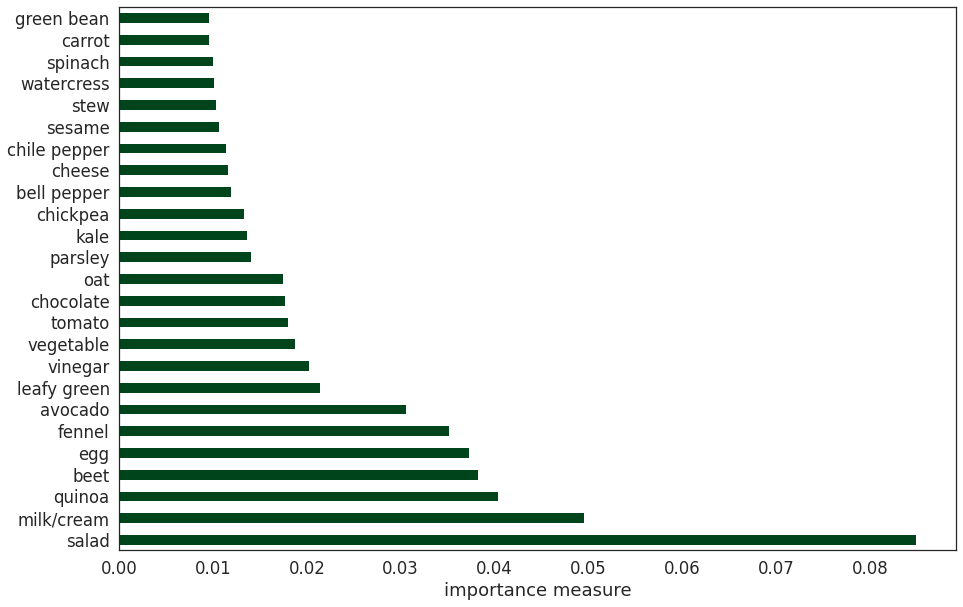

In [ ]:
us_rf = RandomForestClassifier(bootstrap=True, max_depth=8, max_features='auto',n_estimators=200)
us_rf.fit(X_train, y_train)
#importances = us_rf.feature_importances_
#create_plot_of_feature_importances(best_forest, X_train)
feat_importances = pd.Series(us_rf.feature_importances_, index=X.columns)
plt.figure(figsize=(15, 10))
plt.xlabel('importance measure')

feat_importances.nlargest(25).plot(kind='barh', cmap='Greens_r')

print(feat_importances.nlargest(25))

Based on the **confusion matrix and accuracy of around 65%** using Cross Validation, here are **25 ingredients which are widely used in vegetarian recipes** with their importance value. So here **salad** is the most used feature.

In [ ]:
print(max(healthy_food['calories']))
print(max(df_v['rating']))

1662.0
5.0


In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
us = RandomUnderSampler()
rf = RandomForestClassifier(random_state=1902, n_jobs=-1)

pipeline = Pipeline([('undersample', us), ('rf', rf)])

kf = StratifiedKFold(n_splits = 5, random_state=1902)

params = {'rf__max_depth' : [5],
    'rf__max_features' : ['auto','sqrt'],
    'rf__bootstrap' : [True, False],
    'rf__n_estimators' : [100, 200]
}

grid_undersample = GridSearchCV(pipeline, param_grid = params, scoring = 'precision', cv = kf)

grid_undersample.fit(X_train, y_train)

pred_undersample_train = grid_undersample.predict(X_train)
pred_undersample_test = grid_undersample.predict(X_test)

best_parameters = grid_undersample.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

# Best accuracy
print('Best precision score: %.3f' % grid_undersample.best_score_)

Grid Search found the following optimal parameters: 
rf__bootstrap: True
rf__max_depth: 5
rf__max_features: 'auto'
rf__n_estimators: 200
Best precision score: 0.262


In [ ]:
print(classification_report(y_train, pred_undersample_train))
print(classification_report(y_test, pred_undersample_test))

              precision    recall  f1-score   support

         0.0       0.97      0.67      0.79      3557
         1.0       0.27      0.85      0.41       510

    accuracy                           0.69      4067
   macro avg       0.62      0.76      0.60      4067
weighted avg       0.88      0.69      0.74      4067

              precision    recall  f1-score   support

         0.0       0.97      0.67      0.79       395
         1.0       0.27      0.88      0.42        57

    accuracy                           0.69       452
   macro avg       0.62      0.77      0.60       452
weighted avg       0.89      0.69      0.74       452



In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
classes=['unhealthy','healthy']
cnf_matrix = confusion_matrix(y_test, pred_undersample_test)
print(cnf_matrix)

[[263 132]
 [  7  50]]


By **undersampling** accuracy **improved 5%** than the previous approach where we used normal data random forest classifier

**Exploratory Analysis for Non-Vegetarian Recipes**

In [ ]:
df_nv = df_new[df_new['vegetarian']==0.0]
df_nv.head()

,title,rating,calories,protein,fat,sodium,alcoholic,almond,amaretto,anchovy,anise,aperitif,apple,apple juice,apricot,artichoke,arugula,asian pear,asparagus,aspen,avocado,bacon,banana,barley,basil,bass,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,biscuit,bitters,blackberry,blue cheese,blueberry,...,stock,strawberry,sweet potato/yam,swiss cheese,swordfish,tamarind,tangerine,tapioca,tarragon,tea,tequila,thyme,tilapia,tofu,tomatillo,tomato,trout,tuna,turnip,vanilla,veal,vegetable,vegetarian,venison,vermouth,vinegar,vodka,walnut,wasabi,watercress,watermelon,whiskey,white wine,whole wheat,wild rice,wine,yellow squash,yogurt,zucchini,Total_Ingredients_Used
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
5,The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
8,Korean Marinated Beef,4.375,170.0,7.0,10.0,1272.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


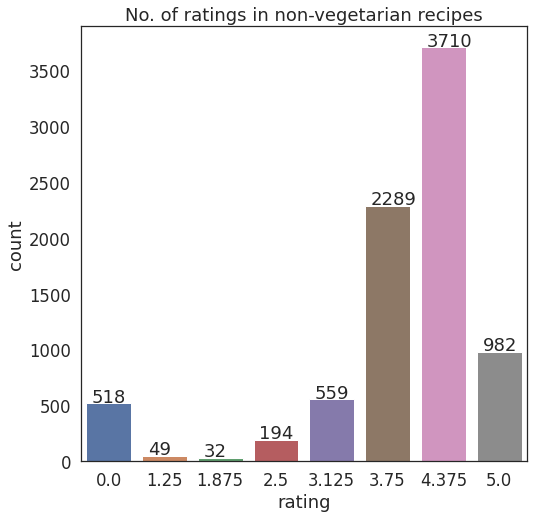

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x=df_nv['rating'], data=df_nv)
plt.title("No. of ratings in non-vegetarian recipes")

for p in ax.patches:
        ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))


This above barplot shows that just like vegetarian recipes, **non-vegetarian recipes** also has the **highest count** with **rating 4.375.**

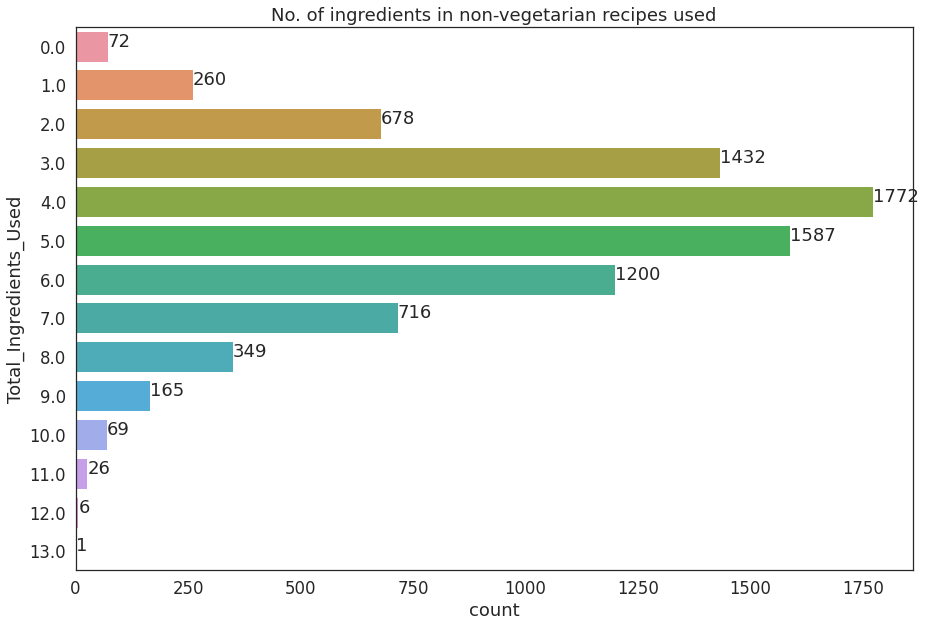

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.countplot(y=df_nv['Total_Ingredients_Used'], data=df_nv)
plt.title("No. of ingredients in non-vegetarian recipes used")

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
total = len(df_nv['Total_Ingredients_Used'])
for p in ax.patches:
        values = '{:.0f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(values, (x, y))

plt.show()

In [ ]:
continuous = ['calories','protein','fat','sodium']
cont_df = df_nv[continuous]

cont_df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,8333.0,531.964359,412.060477,13.0,255.0,427.0,693.0,3310.0
protein,8333.0,27.747270,28.917566,1.0,6.0,19.0,40.0,200.0
fat,8333.0,31.398176,30.436150,1.0,12.0,22.0,41.0,230.0
sodium,8333.0,691.104644,798.046764,1.0,166.0,453.0,925.0,7224.0


In [ ]:
#99th quantile values
cont_df.quantile(q=.99)

calories    3319.52
protein      198.00
fat          226.00
sodium      7240.66
Name: 0.99, dtype: float64

In [ ]:
# Remove recipes with outliers in calories and sodium
idx = df_nv.loc[(df_nv.calories > 3320.0) | (df_nv.sodium > 7250.0)| (df_nv.protein > 200)| (df_nv.fat > 230)].index
df_nv.drop(index=idx, inplace=True)

# Remove recipes with a 0 in any nutrition value
idx0 = df_nv.loc[(df_nv.calories == 0)|(df_nv.sodium == 0) | (df_nv.protein == 0) | (df_nv.fat == 0)].index
df_nv.drop(index=idx0, inplace=True)

df_nv.shape

(8333, 347)

In [ ]:
df_nv_stats = df_nv[['title','calories','protein','fat','sodium','healthy']]

df_nv_stats.shape

(8333, 6)

In [ ]:
df_nv_stats.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,8333.0,531.964359,412.060477,13.0,255.0,427.0,693.0,3310.0
protein,8333.0,27.747270,28.917566,1.0,6.0,19.0,40.0,200.0
fat,8333.0,31.398176,30.436150,1.0,12.0,22.0,41.0,230.0
sodium,8333.0,691.104644,798.046764,1.0,166.0,453.0,925.0,7224.0
healthy,8333.0,0.060122,0.237728,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Add a protein/fat column
df_nv_stats['prot_fat'] =(df_nv_stats.protein/df_nv_stats.fat)

# Add a protein/calorie column
df_nv_stats['prot_cal'] =(df_nv_stats.protein/df_nv_stats.calories)

# Add a protein/sodium column
df_nv_stats['prot_sod'] =(df_nv_stats.protein/df_nv_stats.sodium)

#Add a compound column for all the 'bad' nutrition, in log scale 
df_nv_stats['compound'] =(df_nv_stats.calories*df_nv_stats.fat*df_nv_stats.sodium)
df_nv_stats['compound'] = [math.log(x,10) for x in df_nv_stats['compound']]

In [ ]:
healthy_nv_food = df_nv_stats[df_nv_stats['healthy']==1]
unhealthy_nv_food = df_nv_stats[df_nv_stats['healthy']==0]

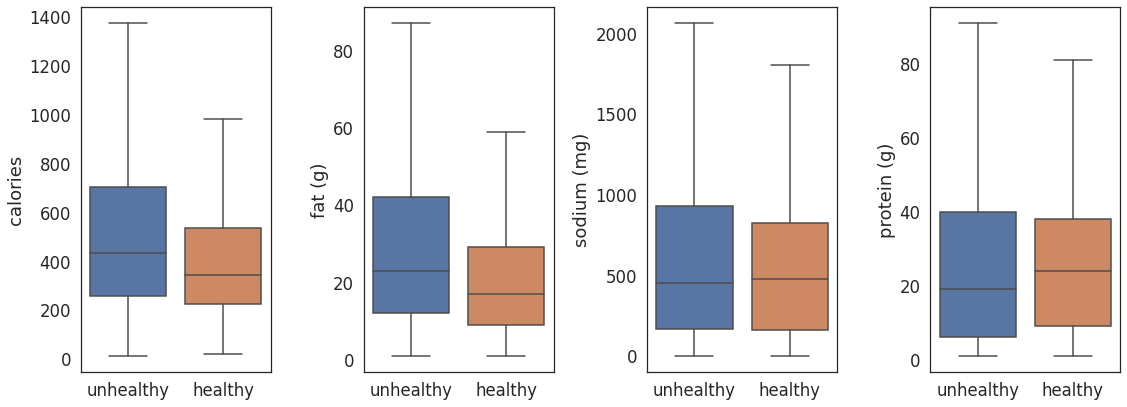

In [ ]:
fig, axs = plt.subplots(ncols=4, figsize=(16,6),sharex=True)

sns.boxplot(y= 'calories', x='healthy', data=df_nv_stats, showfliers=False, ax=axs[0])
sns.boxplot(y= 'fat', x='healthy', data=df_nv_stats, showfliers=False, ax=axs[1])
sns.boxplot(y= 'sodium', x='healthy', data=df_nv_stats, showfliers=False, ax=axs[2])
sns.boxplot(y= 'protein', x='healthy', data=df_nv_stats, showfliers=False, ax=axs[3])

axs[0].set_xticklabels(['unhealthy','healthy'])
axs[1].set_xticklabels(['unhealthy','healthy'])
axs[2].set_xticklabels(['unhealthy','healthy'])
axs[3].set_xticklabels(['unhealthy','healthy'])

axs[0].set_xlabel(None)
axs[1].set_xlabel(None)
axs[2].set_xlabel(None)
axs[3].set_xlabel(None)

axs[1].set_ylabel('fat (g)')
axs[2].set_ylabel('sodium (mg)')
axs[3].set_ylabel('protein (g)')

plt.tight_layout()
# plt.legend()

From these box plots for **non-vegetarian recipes** it shows that only **protein has higher value in healthy** than the rest features.

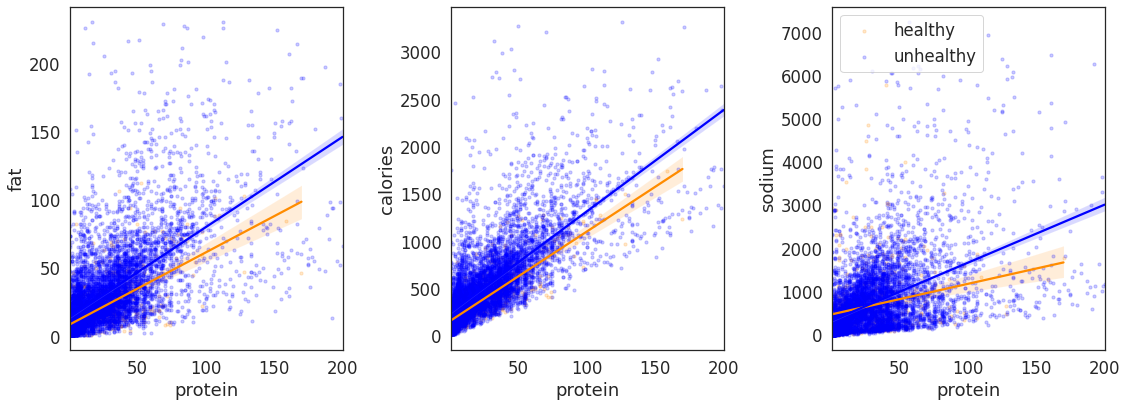

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(16,6))
sns.set(font_scale=1.5)
sns.set_style("white")

s=10

sns.regplot(x='protein',y='fat',data=healthy_nv_food, label='healthy',scatter_kws={'alpha':0.2,'s':s},ax=axs[0],color='darkorange')
sns.regplot(x='protein',y='fat',data=unhealthy_nv_food, label='unhealthy',scatter_kws={'alpha':0.2,'s':s},ax=axs[0],color='blue')

sns.regplot(x='protein',y='calories',data=healthy_nv_food, label='healthy',scatter_kws={'alpha':0.2,'s':s},ax=axs[1],color='darkorange')
sns.regplot(x='protein',y='calories',data=unhealthy_nv_food, label='unhealthy',scatter_kws={'alpha':0.2,'s':s},ax=axs[1],color='blue')

sns.regplot(x='protein',y='sodium',data=healthy_nv_food, label='healthy',scatter_kws={'alpha':0.2,'s':s},ax=axs[2],color='darkorange')
sns.regplot(x='protein',y='sodium',data=unhealthy_nv_food, label='unhealthy',scatter_kws={'alpha':0.2,'s':s},ax=axs[2],color='blue')

plt.tight_layout()
plt.legend()

The **paired regression plots plotted for protein** against other three feature also shows that **unhealthy food has high amount of fat, sodium and calories than the healthier ones.** 

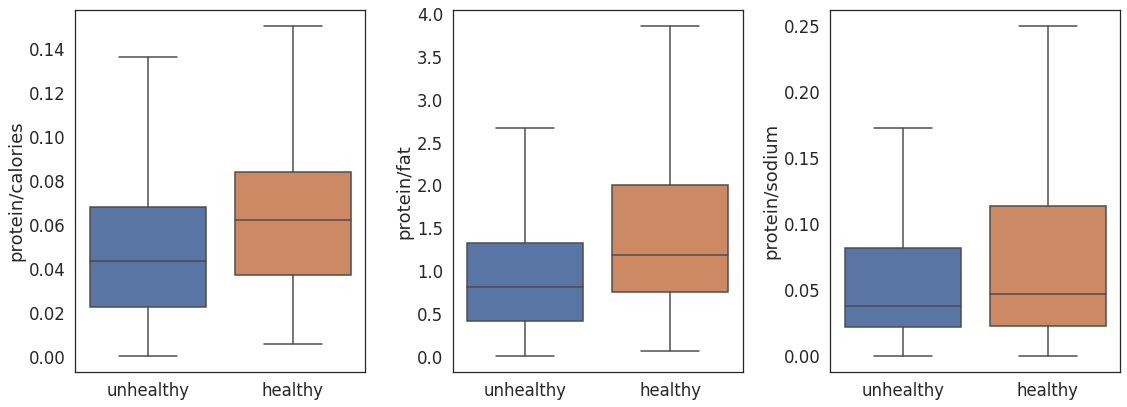

In [ ]:
fig, axs = plt.subplots(ncols=3, figsize=(16,6))

sns.boxplot(y= 'prot_cal', x='healthy', data=df_nv_stats, showfliers=False, ax=axs[0])
sns.boxplot(y= 'prot_fat', x='healthy', data=df_nv_stats, showfliers=False, ax=axs[1])
sns.boxplot(y= 'prot_sod', x='healthy', data=df_nv_stats, showfliers=False, ax=axs[2])

axs[0].set_xticklabels(['unhealthy','healthy'])
axs[1].set_xticklabels(['unhealthy','healthy'])
axs[2].set_xticklabels(['unhealthy','healthy'])


axs[0].set_xlabel(None)
axs[1].set_xlabel(None)
axs[2].set_xlabel(None)


axs[0].set_ylabel('protein/calories')
axs[1].set_ylabel('protein/fat')
axs[2].set_ylabel('protein/sodium')

plt.tight_layout()

In [ ]:
#sodium ideal limit of no more than 1,500 mg per day for most adults.
print(healthy_nv_food.sodium.mean())
print(unhealthy_nv_food.sodium.mean())

663.0858283433133
692.8969611848826


In [ ]:
healthy_nv_food.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,501.0,417.518962,282.540769,18.000000,224.000000,345.000000,534.000000,1740.000000
protein,501.0,27.676647,23.972468,1.000000,9.000000,24.000000,38.000000,170.000000
fat,501.0,22.840319,20.280396,1.000000,9.000000,17.000000,29.000000,112.000000
sodium,501.0,663.085828,732.910340,2.000000,163.000000,476.000000,823.000000,5781.000000
healthy,501.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
prot_fat,501.0,1.699123,1.765882,0.060976,0.750000,1.189189,2.000000,16.000000
prot_cal,501.0,0.064257,0.034498,0.005882,0.037457,0.062130,0.083900,0.182266
prot_sod,501.0,0.099618,0.187581,0.000343,0.022928,0.047189,0.113846,3.000000
compound,501.0,6.253869,1.067599,1.857332,5.693783,6.353709,6.984414,8.596436


In [ ]:
unhealthy_nv_food.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,7832.0,539.285240,417.933126,13.000000,257.000000,434.000000,704.000000,3310.000000
protein,7832.0,27.751788,29.206703,1.000000,6.000000,19.000000,40.000000,200.000000
fat,7832.0,31.945608,30.893019,1.000000,12.000000,23.000000,42.000000,230.000000
sodium,7832.0,692.896961,802.043390,1.000000,167.750000,453.000000,928.000000,7224.000000
healthy,7832.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
prot_fat,7832.0,1.125352,1.326366,0.009259,0.421053,0.813030,1.323017,30.000000
prot_cal,7832.0,0.048694,0.032430,0.000571,0.022710,0.043825,0.068182,0.215311
prot_sod,7832.0,0.078519,0.142008,0.000430,0.021921,0.038095,0.082224,4.500000
compound,7832.0,6.460370,1.208277,1.301030,5.780122,6.602381,7.312934,9.466055


BootStrap healthy and unhealthy foods per nutrition in non-vegetarian recipes

In [ ]:
from math import sqrt
from sklearn.utils import resample

In [ ]:
#sodium

x_mean = healthy_nv_food.sodium.mean()
y_mean = unhealthy_nv_food.sodium.mean()

x_std = healthy_nv_food.sodium.std()
y_std = unhealthy_nv_food.sodium.std()

t_fat = (x_mean-y_mean)/sqrt((x_std**2/len(healthy_nv_food))+(y_std**2/len(unhealthy_nv_food)))

z = df_nv_stats.sodium.mean()

xx = healthy_nv_food.sodium - x_mean + z
yy = unhealthy_nv_food.sodium - y_mean + z

t_bs=0
n_sim = 1000
for i in range(n_sim):
    x_bs= resample(xx, replace=True, n_samples=len(xx))
    y_bs= resample(yy, replace=True, n_samples=len(yy))
    ttest = (x_bs.mean()-y_bs.mean())/sqrt((x_bs.std()**2/len(x_bs))+(y_bs.std()**2/len(y_bs)))
    if ttest>=t_fat:
        t_bs+=1

t_bs/n_sim

0.781

In [ ]:
#fat

x_mean = healthy_nv_food.fat.mean()
y_mean = unhealthy_nv_food.fat.mean()

x_std = healthy_nv_food.fat.std()
y_std = unhealthy_nv_food.fat.std()

t_fat = (x_mean-y_mean)/sqrt((x_std**2/len(healthy_nv_food))+(y_std**2/len(unhealthy_nv_food)))

z = df_nv_stats.fat.mean()

xx = healthy_nv_food.fat - x_mean + z
yy = unhealthy_nv_food.fat - y_mean + z

t_bs=0
n_sim = 1000
for i in range(n_sim):
    x_bs= resample(xx, replace=True, n_samples=len(xx))
    y_bs= resample(yy, replace=True, n_samples=len(yy))
    ttest = (x_bs.mean()-y_bs.mean())/sqrt((x_bs.std()**2/len(x_bs))+(y_bs.std()**2/len(y_bs)))
    if ttest>=t_fat:
        t_bs+=1

t_bs/n_sim

1.0

In [ ]:
#protein
x_mean = healthy_nv_food.protein.mean()
y_mean = unhealthy_nv_food.protein.mean()

x_std = healthy_nv_food.protein.std()
y_std = unhealthy_nv_food.protein.std()

t_protein = (x_mean-y_mean)/sqrt((x_std**2/len(healthy_nv_food))+(y_std**2/len(unhealthy_nv_food)))

z = df_nv_stats.protein.mean()

xx = healthy_nv_food.protein - x_mean + z
yy = unhealthy_nv_food.protein - y_mean + z

t_bs=0
n_sim = 1000
for i in range(n_sim):
    x_bs= resample(xx, replace=True, n_samples=len(xx))
    y_bs= resample(yy, replace=True, n_samples=len(yy))
    ttest = (x_bs.mean()-y_bs.mean())/sqrt((x_bs.std()**2/len(x_bs))+(y_bs.std()**2/len(y_bs)))
    if ttest>=t_protein:
        t_bs+=1

t_bs/n_sim

0.518

In [ ]:
#calories
x_mean = healthy_nv_food.calories.mean()
y_mean = unhealthy_nv_food.calories.mean()

x_std = healthy_nv_food.calories.std()
y_std = unhealthy_nv_food.calories.std()

t_calories = (x_mean-y_mean)/sqrt((x_std**2/len(healthy_nv_food))+(y_std**2/len(unhealthy_nv_food)))

z = df_nv_stats.calories.mean()

xx = healthy_nv_food.calories - x_mean + z
yy = unhealthy_nv_food.calories - y_mean + z

t_bs=0
n_sim = 1000
for i in range(n_sim):
    x_bs= resample(xx, replace=True, n_samples=len(xx))
    y_bs= resample(yy, replace=True, n_samples=len(yy))
    ttest = (x_bs.mean()-y_bs.mean())/sqrt((x_bs.std()**2/len(x_bs))+(y_bs.std()**2/len(y_bs)))
    if ttest>=t_calories:
        t_bs+=1

t_bs/n_sim

1.0

**T-Test for healthy foods in vegetarian vs non-vegetarian recipes**

**H0:** The mean of sodium in healthy food of veg and non-veg will be same.<br>
**H1:** There is a difference between mean of healthy food sodium in veg and non-veg recipe.

In [ ]:
#sodium
stats.ttest_ind(a=healthy_nv_food.sodium,b=healthy_v_food.sodium,equal_var=False)

Ttest_indResult(statistic=8.800144668523323, pvalue=8.550764393660238e-18)

**H0:** The mean of fat in healthy food of veg and non-veg will be same.<br>
**H2:** There is a difference between mean of healthy food fat in veg and non-veg recipe.

In [ ]:
#fat
stats.ttest_ind(a=healthy_nv_food.fat,b=healthy_v_food.fat,equal_var=False)

Ttest_indResult(statistic=6.297133945219971, pvalue=4.803385334609111e-10)

**H0:** The mean of protein in healthy food of veg and non-veg will be same.<br>
**H3:** There is a difference between mean of healthy food protein in veg and non-veg recipe.

In [ ]:
#protein
stats.ttest_ind(a=healthy_nv_food.protein,b=healthy_v_food.protein,equal_var=False)

Ttest_indResult(statistic=17.414649698626754, pvalue=3.137253446590927e-55)

**H0:** The mean of calories in healthy food of veg and non-veg will be same.<br>
**H4:** There is a difference between mean of healthy food calories in veg and non-veg recipe.

In [ ]:
#calories
stats.ttest_ind(a=healthy_nv_food.calories,b=healthy_v_food.calories,equal_var=False)

Ttest_indResult(statistic=8.047195202774263, pvalue=2.6923708220021454e-15)

From the **two sample t-test** it states that the **p-value<0.05** mean of all **four features are different** for **healthy food in veg and non-veg dishes.** Hence rejecting the null hypothesis.

**Healthy Recipe Classification in Non-Vegetarian Recipes**

In [ ]:
X = df_nv.drop(['title','healthy', 'rating', 'protein', 'sodium', 'fat', 'calories', 'dessert', 'Total_Ingredients_Used'],axis=1)
y = df_nv['healthy']

from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1902, stratify = y, test_size = .1)

In [ ]:
from sklearn.utils import resample
# concatenate our training data back together
X_resample = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
healthy = X_resample[X_resample.healthy==1]
unhealthy = X_resample[X_resample.healthy==0]
print(f"healthy original count: {len(healthy)}")
print(f"unhealthy original count: {len(unhealthy)}")

# downsample majority
unhealthy_downsampled = resample(unhealthy,
                               replace = False, # sample without replacement
                               n_samples = len(healthy), # match minority n
                               random_state = 0) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([unhealthy_downsampled, healthy])

# checking counts
downsampled.healthy.value_counts()

healthy original count: 451
unhealthy original count: 7048


1.0    451
0.0    451
Name: healthy, dtype: int64

In [ ]:
X_rs_train = downsampled.drop('healthy', axis=1)
y_rs_train = downsampled['healthy']

In [ ]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
# Running a standard random forest 
forest = RandomForestClassifier(n_jobs=-1,
                                random_state=19)

forest.fit(X_rs_train, y_rs_train)

pred_forest = forest.predict(X_rs_train)
pred_forest_test = forest.predict(X_test)

train_m = classification_report(y_rs_train, pred_forest)
test_m = classification_report(y_test, pred_forest_test)
print(train_m)
print(test_m)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       451
         1.0       1.00      0.99      0.99       451

    accuracy                           0.99       902
   macro avg       0.99      0.99      0.99       902
weighted avg       0.99      0.99      0.99       902

              precision    recall  f1-score   support

         0.0       0.98      0.70      0.82       784
         1.0       0.13      0.72      0.22        50

    accuracy                           0.70       834
   macro avg       0.55      0.71      0.52       834
weighted avg       0.92      0.70      0.78       834



In [ ]:
# Using Grid Search and Cross Validation

# Set grid search params
param_grid_forest = [ 
  {'n_estimators': [200, 250, 275],
   'criterion': ['gini','entropy'], 
   'max_depth': [5,8,9] 
  }
]

# Construct grid search
gs_rf = GridSearchCV(estimator=forest,
            param_grid=param_grid_forest,
            scoring='precision',
            refit='precision',
            cv=5, verbose=2, return_train_score = True,
            n_jobs=-1)

# Fit using grid search
gs_rf.fit(X_rs_train, y_rs_train)

best_parameters = gs_rf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

# Best accuracy
print('Best precision: %.3f' % gs_rf.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   37.9s finished


Grid Search found the following optimal parameters: 
criterion: 'entropy'
max_depth: 5
n_estimators: 275
Best precision: 0.686


In [ ]:
# Fit using grid search

best_forest = gs_rf.best_estimator_
best_forest.fit(X_rs_train, y_rs_train)

pred_gs_rf_train = best_forest.predict(X_rs_train)
pred_gs_rf_test = best_forest.predict(X_test)

print(classification_report(y_rs_train, pred_gs_rf_train))
print(classification_report(y_test, pred_gs_rf_test))

              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79       451
         1.0       0.78      0.80      0.79       451

    accuracy                           0.79       902
   macro avg       0.79      0.79      0.79       902
weighted avg       0.79      0.79      0.79       902

              precision    recall  f1-score   support

         0.0       0.97      0.71      0.82       784
         1.0       0.13      0.66      0.21        50

    accuracy                           0.71       834
   macro avg       0.55      0.68      0.52       834
weighted avg       0.92      0.71      0.78       834



In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
classes=['unhealthy','healthy']
cnf_matrix = confusion_matrix(y_test, pred_gs_rf_test)
print(cnf_matrix)

[[556 228]
 [ 17  33]]


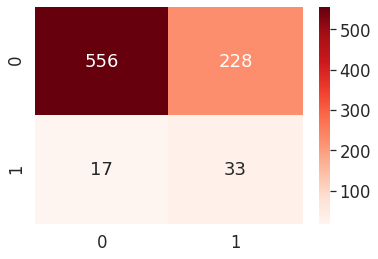

In [ ]:
import seaborn as sns
sns.heatmap(cnf_matrix, annot=True, fmt='g', cmap='Reds')

Unhealthy - 0<br>
Healthy - 1

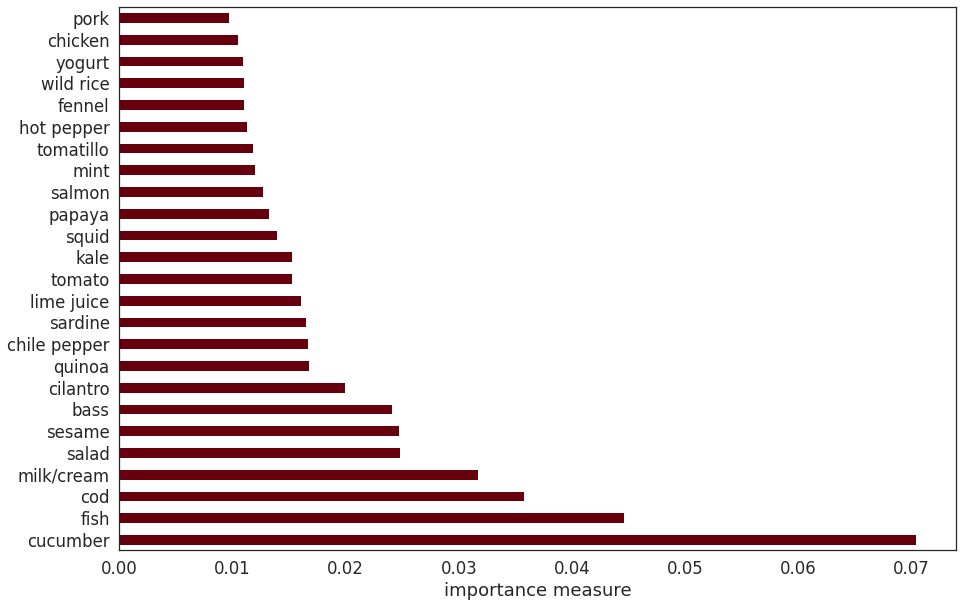

In [ ]:
us_rf = RandomForestClassifier(bootstrap=True, max_depth=5, max_features='auto',n_estimators=275)
us_rf.fit(X_train, y_train)
#importances = us_rf.feature_importances_
#create_plot_of_feature_importances(best_forest, X_train)
feat_importances = pd.Series(us_rf.feature_importances_, index=X.columns)
plt.figure(figsize=(15, 10))
plt.xlabel('importance measure')

feat_importances.nlargest(25).plot(kind='barh', cmap='Reds_r')

This above chart shows the most important ingredients used for n**on-vegetarian recipes to cook**

In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
us = RandomUnderSampler()
rf = RandomForestClassifier(random_state=1902, n_jobs=-1)

pipeline = Pipeline([('undersample', us), ('rf', rf)])

kf = StratifiedKFold(n_splits = 5, random_state=1902)

params = {'rf__max_depth' : [5],
    'rf__max_features' : ['auto','sqrt'],
    'rf__bootstrap' : [True, False],
    'rf__n_estimators' : [100, 200]
}

grid_undersample = GridSearchCV(pipeline, param_grid = params, scoring = 'precision', cv = kf)

grid_undersample.fit(X_train, y_train)

pred_undersample_train = grid_undersample.predict(X_train)
pred_undersample_test = grid_undersample.predict(X_test)

best_parameters = grid_undersample.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

# Best accuracy
print('Best precision score: %.3f' % grid_undersample.best_score_)

Grid Search found the following optimal parameters: 
rf__bootstrap: True
rf__max_depth: 5
rf__max_features: 'auto'
rf__n_estimators: 100
Best precision score: 0.124


In [ ]:
print(classification_report(y_train, pred_undersample_train))
print(classification_report(y_test, pred_undersample_test))

              precision    recall  f1-score   support

         0.0       0.98      0.69      0.81      7048
         1.0       0.14      0.76      0.23       451

    accuracy                           0.70      7499
   macro avg       0.56      0.73      0.52      7499
weighted avg       0.93      0.70      0.78      7499

              precision    recall  f1-score   support

         0.0       0.97      0.72      0.83       784
         1.0       0.14      0.70      0.23        50

    accuracy                           0.72       834
   macro avg       0.56      0.71      0.53       834
weighted avg       0.92      0.72      0.79       834



# Preferred Recipes based on rating, low cal and few no. of ingredients

**For Vegetarian Healthy Recipes**

In [ ]:
min(healthy_v_food.calories)

31.0

In [ ]:
a = df_new[(df_new['vegetarian']==1.0) & (df_new['Total_Ingredients_Used']>=4.0) & (df_new['rating']>=4.0) & (df_new['healthy']==1.0) & (df_new['calories']<=150)]
a['title']

388                         Tomato and Tomatillo Gazpacho 
423                                        Pickled Onions 
475                  Fruit Salad with Honey-Lime Dressing 
503                                          Quick Kimchi 
1030             Slightly Sweet Dill Refrigerator Pickles 
                               ...                        
18643                            Brazilian Collard Greens 
18775    Endive and Escarole Salad with Mustard-Orange ...
18784                       Melon with Basil-Lime Granita 
18955          Spinach with Olives, Raisins and Pine Nuts 
19151                      Pickled Vegetable Lettuce Cups 
Name: title, Length: 91, dtype: object

**For Non-Vegetarian Healthy Recipes**

In [ ]:
b = df_new[(df_new['vegetarian']==0.0) & (df_new['Total_Ingredients_Used']>=4.0) & (df_new['rating']>=3.0) & (df_new['healthy']==1.0) & (df_new['calories']<=150)]
b['title']

1785                                          Mango Salsa 
1795                                  Korean BBQ Marinade 
2314                                    Tabil Spice Blend 
2451                    Sefrou Apricot (Galettes Sucrees) 
2776                                          Salsa Verde 
2821                                      Teriyaki Salmon 
2936           Calamari Salad with Passion-Fruit Dressing 
3087                              Thai Green Papaya Salad 
3104              Fresh Artichoke and White Bean Crostini 
3510         Leek-Wrapped Pompano with Roasted Beet Sauce 
3536                                      Shrimp Gazpacho 
3865               Tomato, Onion, and Serrano Chile Salsa 
4308                                Do-Ahead Turkey Stock 
4847                      Sweet, Salty, and Sour Marinade 
4855      Prosciutto-Wrapped Asparagus with Mint Dressing 
5687                                        Mojo Marinade 
6722                               Cranberry Crunch Sala